# Exploring Suicide Rates From 1985-2016

By Lance Ngo

## Introduction

We will be exploring the data set about suicide from many countries globally between 1985-2016. This data set was compiled from the United Nations, World Health Organization, and the World Bank. I chose this data set because I thought that it would be very interesting to learn more about suicide rates and finding possible reasons that caused it to either increase or decrease. The data set can be found at https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/data.

In [108]:
#importing libraries into python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

#loading dataset in to python
df = pd.read_csv('suicide.csv')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [109]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


## Data

The data set is a csv file with one table consisting of the following columns:

1. country 
2. year - year of the data given
3. sex- gender
4. age - population divided into certain age groups
5. suicides_no - total number of suicides
6. population - total number of people in the country
7. suicides/100k pop - total number of suicides per 100,000 people in the country
8. country-year
9. HDI for year - human development index for the year
10. gdp_per_year (\$) - the GDP for the country in USD
11. gdp_per_capita ($) - the GDP of the country divided by population in USD
12. generation - gives the generation of the age group focused during that year  
    a. G.I. Generation - 1910-1924  
    b. Silent Generation - 1925-1945  
    c. Boomer Generation - 1946-1964  
    d. Generation X - 1965-1979  
    e. Generation Z - 1995-2012  

## Analytical Questions

### 1) Which gender committed suicide more and by how much?

Upon looking at the data, the first question was to see which gender committed suicide more.


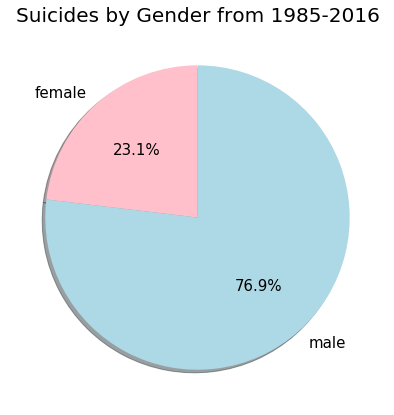

In [6]:
#Groups and adds up the suicide numbers for each gender and plots it as a pie graph

suicide_country_sex = df.groupby('sex').aggregate(np.sum)
suicide_country_sex = suicide_country_sex.reset_index()
suicide_country_sex.sort_values(by=['suicides_no'], inplace =True)

fig, ax = plt.subplots(figsize=(12,7))
ax.pie(suicide_country_sex['suicides_no'], labels=suicide_country_sex['sex'], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['pink','lightblue'],textprops={'fontsize': 15})
plt.title('Suicides by Gender from 1985-2016',size=20)
plt.show()


Looking at the graph, the overall rate of suicide by males is over three times the higher than the rate of suicide by females. After seeing the graph, I was curious to see if the three times higher rate of suicides by males held true for all age groups.

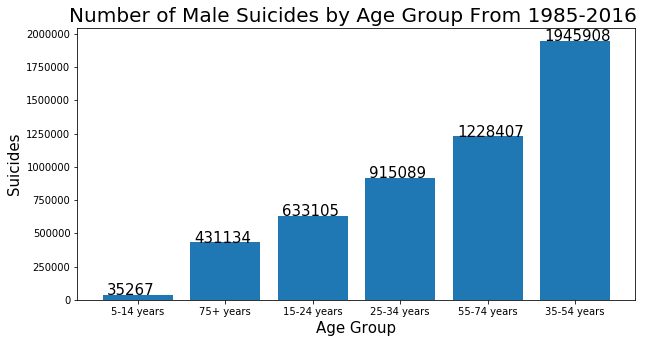

In [44]:
#divides the data into age groups by males and graphs it
female = df[df.sex == 'female']
male = df[df.sex == 'male']

female_year_age = female.groupby('age').aggregate(np.sum)
female_year_age = female_year_age.reset_index()
female_year_age.sort_values(by=['suicides_no'], inplace =True)

male_year_age = male.groupby('age').aggregate(np.sum)
male_year_age = male_year_age.reset_index()
male_year_age.sort_values(by=['suicides_no'], inplace =True)

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(male_year_age['age'], male_year_age['suicides_no'])
plt.title('Number of Male Suicides by Age Group From 1985-2016 ', size=20)
plt.ylabel('Suicides', size=15)
plt.xlabel('Age Group', size=15)
for index,data in enumerate(male_year_age['suicides_no']):
    plt.text(x=index-.35 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

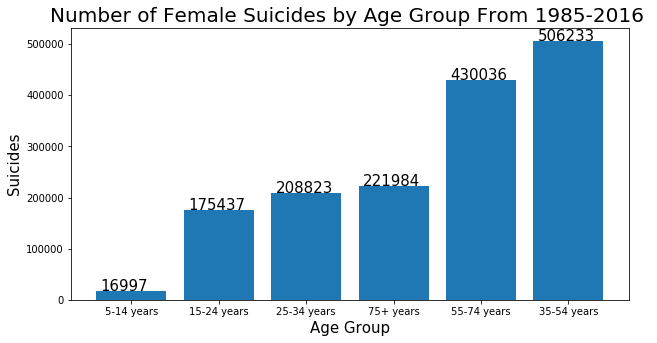

In [45]:
#divides the data into age groups by females and graphs it
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(female_year_age['age'], female_year_age['suicides_no'])
plt.title('Number of Female Suicides by Age Group From 1985-2016 ', size=20)
plt.ylabel('Suicides', size=15)
plt.xlabel('Age Group', size=15)
for index,data in enumerate(female_year_age['suicides_no']):
    plt.text(x=index-.35 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()


The two age groups with the most suicides are the same between both genders but the third to fifth age groups are where the data is different. The age group of 75+ year olds among females is third highest where as it is the fifth highest among males. In order to help verify that the populations of males and females are different, a t-test was run. 

In [111]:
#runs independent t-test on female/male populations
from scipy.stats import ttest_ind
print(ttest_ind(female['suicides_no'], male['suicides_no'], equal_var=False))

Ttest_indResult(statistic=-24.378626630539273, pvalue=6.4421074798191e-129)


After performing a t-test on the female and male datasets to see if there is a significant difference in the populations, the results show that they are quite different. We set the null hypothesis as the male and female populations have the same suicide rates. The t-value of -24 has a high magnitude and shows that there is a high amount of variance in suicides between males and females. The p-value of 6.44e-10 is extremely low and shows that we can reject the null hypothesis. Therefore, the rates of suicides between males and females are statistically significantly different. It is possible that the numbers of males who could have committed suicide were significantly smaller than it would have been had a large number of males not been killed fighting in the multiple wars during this time frame. 

### 2) Which age group committed suicide the most?


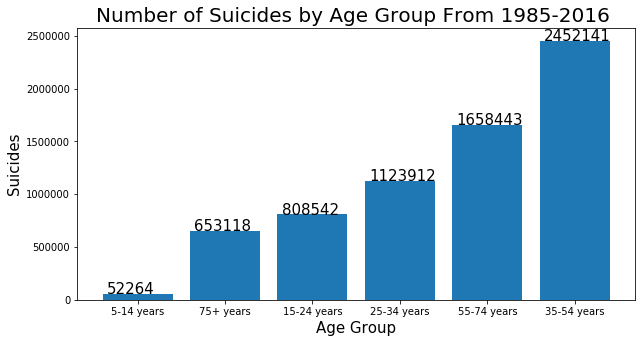

In [34]:
#Group the data set to find the suicide numbers by age and plots it

suicide_country_age = df.groupby('age').aggregate(np.sum)
suicide_country_age = suicide_country_age.reset_index()
suicide_country_age.sort_values(by=['suicides_no'], inplace =True)

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(suicide_country_age['age'], suicide_country_age['suicides_no'])
plt.title('Number of Suicides by Age Group From 1985-2016 ', size=20)
plt.ylabel('Suicides', size=15)
plt.xlabel('Age Group', size=15)
for index,data in enumerate(suicide_country_age['suicides_no']):
    plt.text(x=index-.35 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()



The age group with the highest suicide numbers was 35-54 years old. The number of suicides is nearly 1.5 times higher than the next age group, 55-74 years old. According to the data, 61% of the total suicides were by people aged 35-74. We must also take note that the population size of people aged 75+ may be smaller than the other populations' sample size because it is rarer for people to live to 75 years old. Looking further at the suicide rates by generation, we may be able to see if there was a generational cause that led to higher suicides.


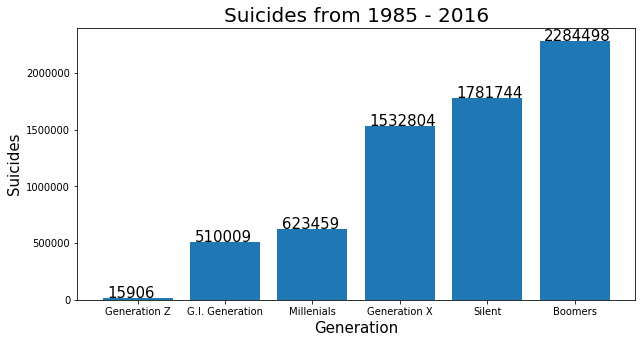

In [67]:
#Group the data set to find the suicide numbers by generation and plots it

suicide_country_gen = df.groupby('generation').aggregate(np.sum)
suicide_country_gen = suicide_country_gen.reset_index()
suicide_country_gen.sort_values(by=['suicides_no'], inplace =True)

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(suicide_country_gen['generation'], suicide_country_gen['suicides_no'])
plt.title('Suicides from 1985 - 2016', size=20)
plt.ylabel('Suicides', size=15)
plt.xlabel('Generation', size=15)
for index,data in enumerate(suicide_country_gen['suicides_no']):
    plt.text(x=index-.35 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

The data shows that there is a very large difference in suicides committed by Generation Z (born 1995-2012) and the G.I. Generation (born 1910-1924) compared to Generation X (born 1965-1979), the Silent Generation (born 1925-1945), and the Boomer Generation(born 1946-1964). The 3 generations with the highest suicide numbers encompass most of the people born from 1926 to 1979. One thing that those generations have in common is that they were alive during major wars. It is possible that fighting in the war or dealing with the after effects of war could have caused an increase in suicide rates among these generations.

### 3) Which country experienced the highest suicide rates?

The final question is which country experienced the most suicides during this time frame and what factors could have caused it?

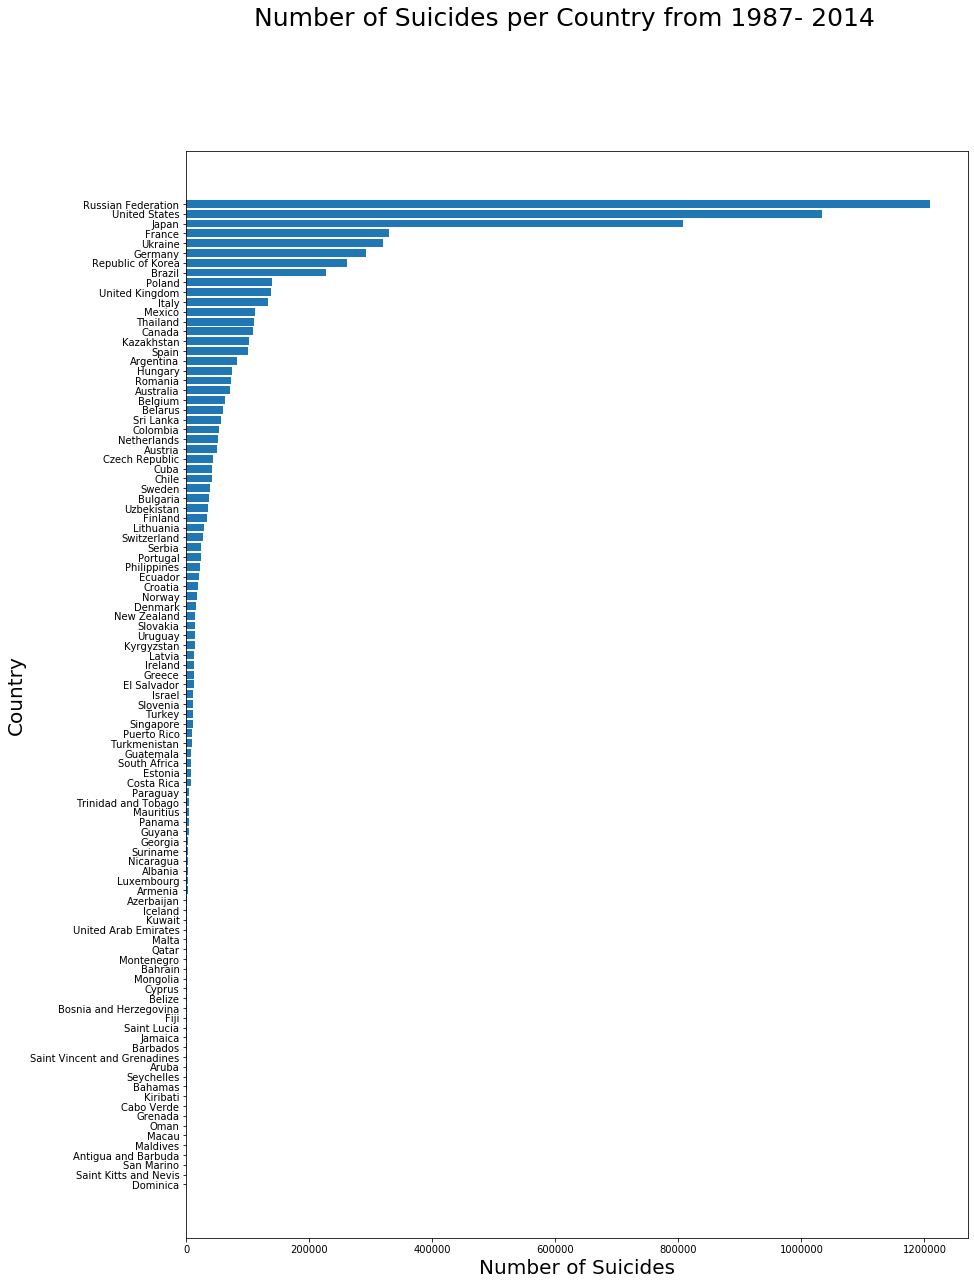

In [69]:
#Sorting data to represent total suicides per country in descending order
suicide_country_total = df.groupby('country').aggregate(np.sum)
suicide_country_total = suicide_country_total.reset_index()
suicide_country_total.sort_values(by=['suicides_no'], inplace =True)

#Plot the number of suicides per country from 1987-2014 
fig, ax = plt.subplots(figsize=(14,20))
ax.barh(suicide_country_total['country'], suicide_country_total['suicides_no'])
ax.set_xlabel('Number of Suicides', fontsize=20)
ax.set_ylabel('Country', fontsize = 20)
fig.suptitle('Number of Suicides per Country from 1987- 2014', fontsize = 25)
plt.show()

The 3 countries that suffered the most suicides were the Russian Federation, the United States, and Japan from 1987-2014. The gap between those 3 countries and the others is quite large with Japan having suffered more than twice the amount of suicides as the next highest country, France. Since some of the countries' populations are much smaller than others, we will consider the suicide rates per 100,000 people.

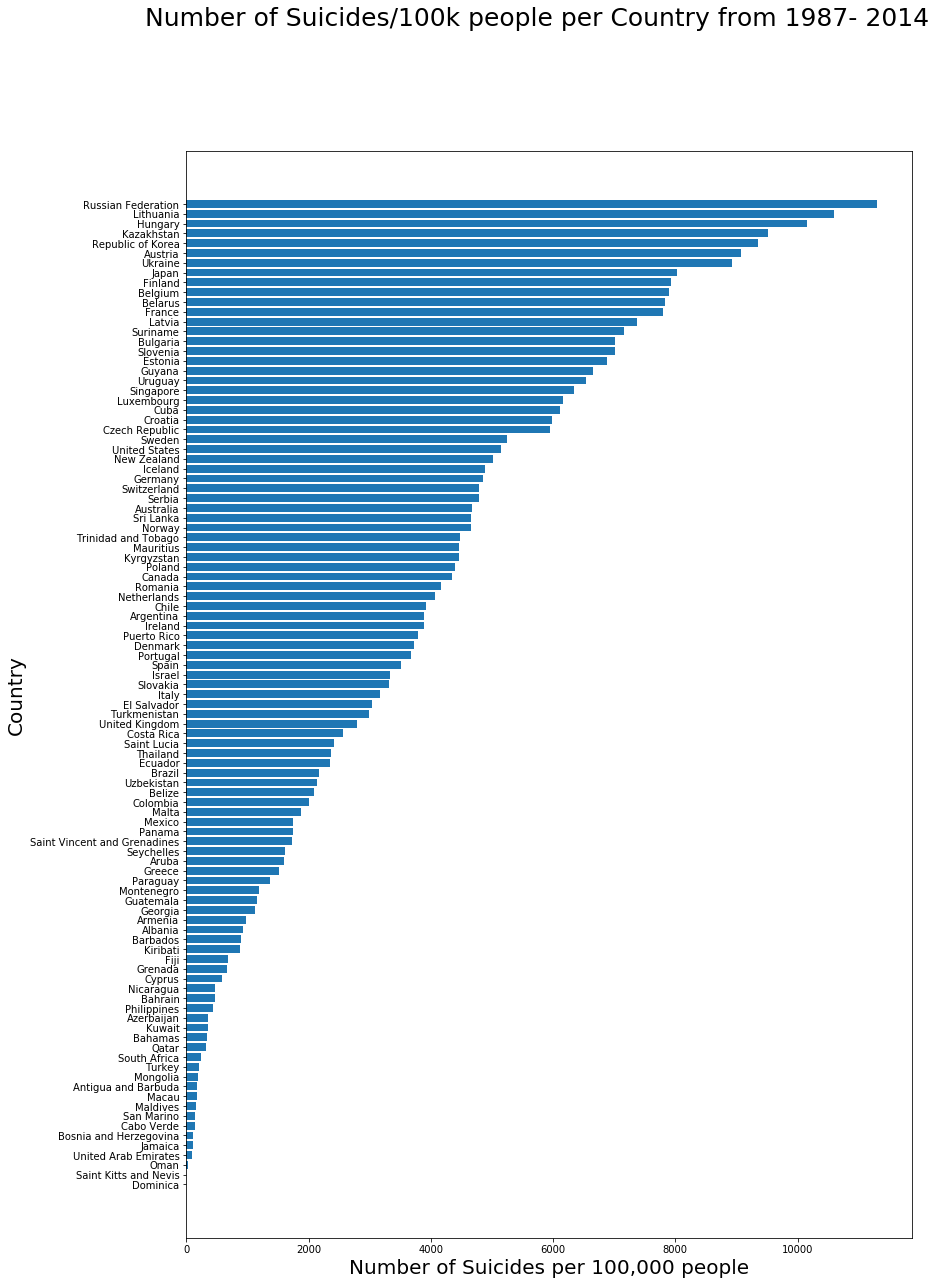

In [70]:
#sorting and graphing suicide/100k population for each country in descending order
suicide_country_100k = df.groupby('country').aggregate(np.sum)
suicide_country_100k = suicide_country_100k.reset_index()
suicide_country_100k.sort_values(by=['suicides/100k pop'], inplace =True)

fig, ax = plt.subplots(figsize=(13,20))
ax.barh(suicide_country_100k['country'], suicide_country_100k['suicides/100k pop'])
ax.set_xlabel('Number of Suicides per 100,000 people', fontsize=20)
ax.set_ylabel('Country', fontsize = 20)
fig.suptitle('Number of Suicides/100k people per Country from 1987- 2014', fontsize = 25)
plt.show()

Taking into account the size of each country's population, the top countries change considerably and there is not as large of a drop off from one country to the next. The Russian Federation still remains at the top of the list so we will take a closer look at their data. 

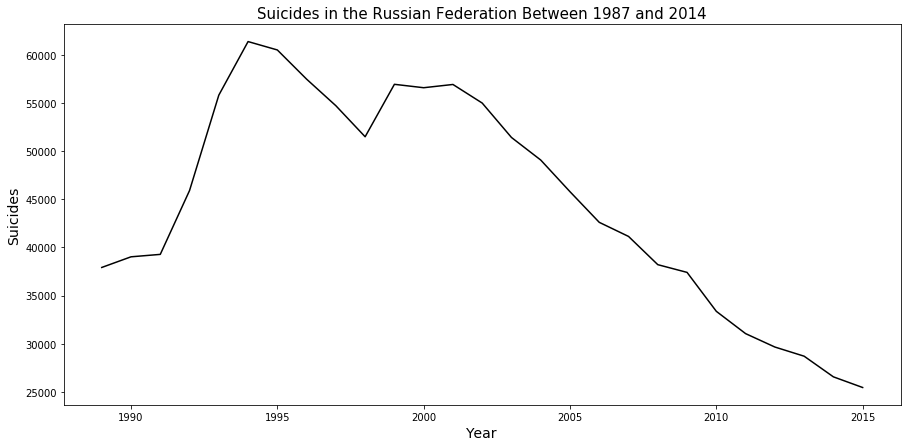

In [71]:
#separates the Russian Federation suicide numbers from the rest of the data and plots it by year

russia = df[df.country == 'Russian Federation']
russia_year_total = russia.groupby('year').aggregate(np.sum)
russia_year_total = russia_year_total.reset_index()

fig, ax = plt.subplots(figsize=(15,7))
plt.plot(russia_year_total['year'], russia_year_total['suicides_no'], color='black')
plt.title('Suicides in the Russian Federation Between 1987 and 2014', size=15)
plt.ylabel('Suicides', size=14)
plt.xlabel('Year', size=14)
plt.show()

From the chart we can see that the suicide rates increase sharply from around 1992-1994 and then begin to decrease until 2014. In order to gain some insight, we take a look at the Russian Federation's suicide rates per 100,000 population per age group over this period of time.

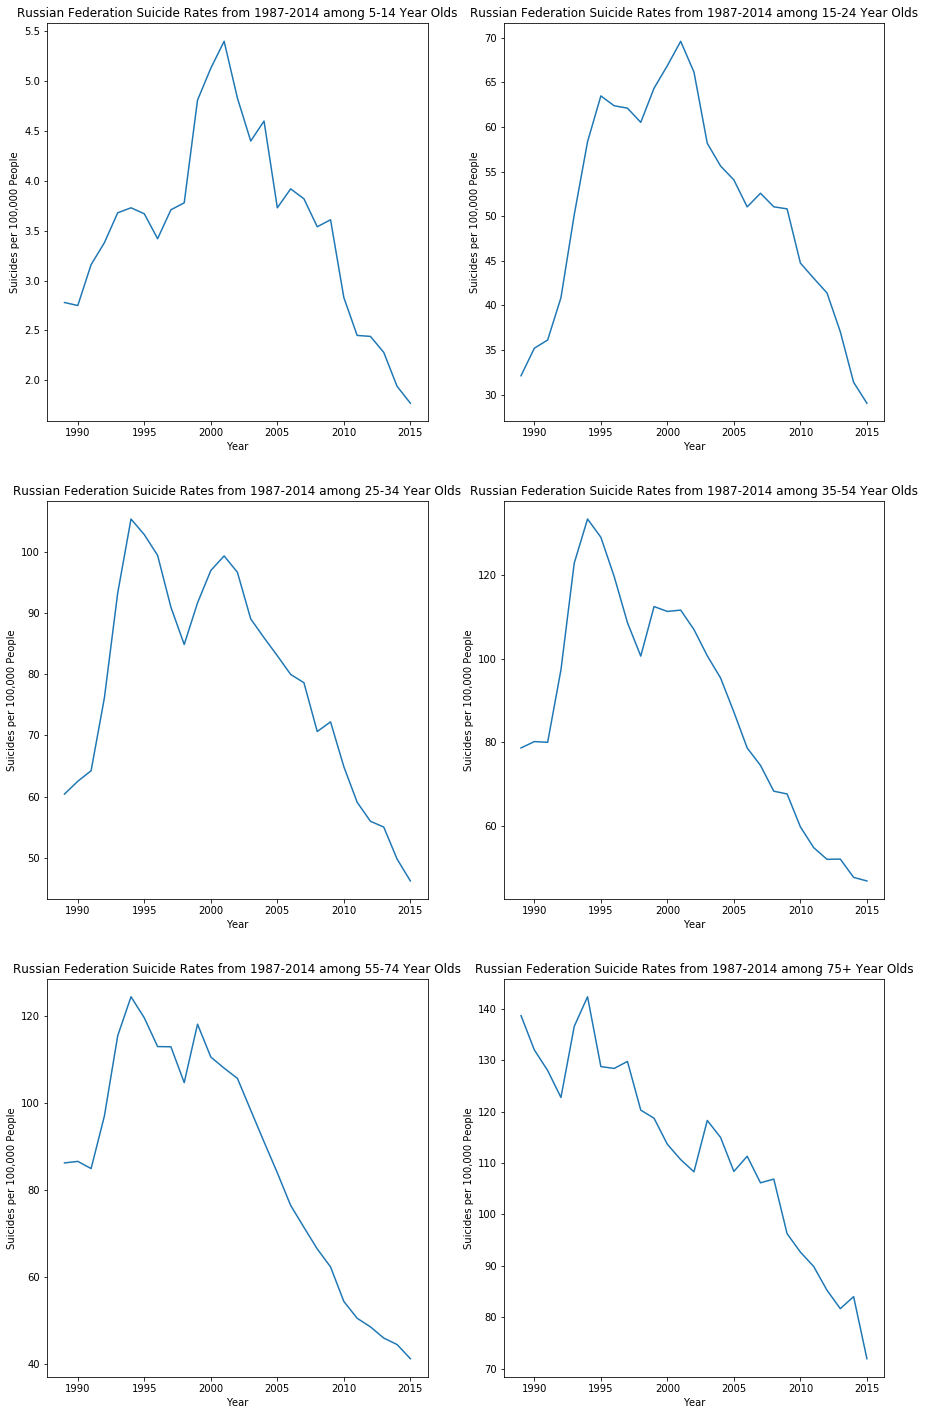

In [72]:
#Splits the Russian federation suicide data into age groups and plots it
russia_year_age = russia.groupby(['age', 'year']).sum()
russia_year_age = russia_year_age.reset_index()

russia_year_age1 = russia_year_age[russia_year_age['age'] == '5-14 years']
russia_year_age2 = russia_year_age[russia_year_age['age'] == '15-24 years']
russia_year_age3 = russia_year_age[russia_year_age['age'] == '25-34 years']
russia_year_age4 = russia_year_age[russia_year_age['age'] == '35-54 years']
russia_year_age5 = russia_year_age[russia_year_age['age'] == '55-74 years']
russia_year_age6 = russia_year_age[russia_year_age['age'] == '75+ years']

plt.figure(figsize=(15, 10))

plt.subplot(3 ,2, 1)
plt.plot(russia_year_age1['year'], russia_year_age1['suicides/100k pop'])
plt.title('Russian Federation Suicide Rates from 1987-2014 among 5-14 Year Olds')
plt.ylabel('Suicides per 100,000 People')
plt.xlabel('Year')


plt.subplot(3 ,2, 2)
plt.plot(russia_year_age2['year'], russia_year_age2['suicides/100k pop'])
plt.title('Russian Federation Suicide Rates from 1987-2014 among 15-24 Year Olds')
plt.ylabel('Suicides per 100,000 People')
plt.xlabel('Year')


plt.subplot(3 ,2, 3)
plt.plot(russia_year_age3['year'], russia_year_age3['suicides/100k pop'])
plt.title('Russian Federation Suicide Rates from 1987-2014 among 25-34 Year Olds')
plt.ylabel('Suicides per 100,000 People')
plt.xlabel('Year')

plt.subplot(3 ,2, 4)
plt.plot(russia_year_age4['year'], russia_year_age4['suicides/100k pop'])
plt.title('Russian Federation Suicide Rates from 1987-2014 among 35-54 Year Olds')
plt.ylabel('Suicides per 100,000 People')
plt.xlabel('Year')


plt.subplot(3 ,2, 5)
plt.plot(russia_year_age5['year'], russia_year_age5['suicides/100k pop'])
plt.title('Russian Federation Suicide Rates from 1987-2014 among 55-74 Year Olds')
plt.ylabel('Suicides per 100,000 People')
plt.xlabel('Year')


plt.subplot(3 ,2, 6)
plt.plot(russia_year_age6['year'], russia_year_age6['suicides/100k pop'])
plt.title('Russian Federation Suicide Rates from 1987-2014 among 75+ Year Olds')
plt.ylabel('Suicides per 100,000 People')
plt.xlabel('Year')

plt.subplots_adjust(bottom=-1)
plt.show()

All of the age groups experienced a steep increase in suicide rates starting in 1991 and maintained high suicide rates until around 2000 when they started to drop except for the 75+ year old age group. In order to find an explanation for these suicide rates, we will now consider the yearly GDP for the Russian federation.

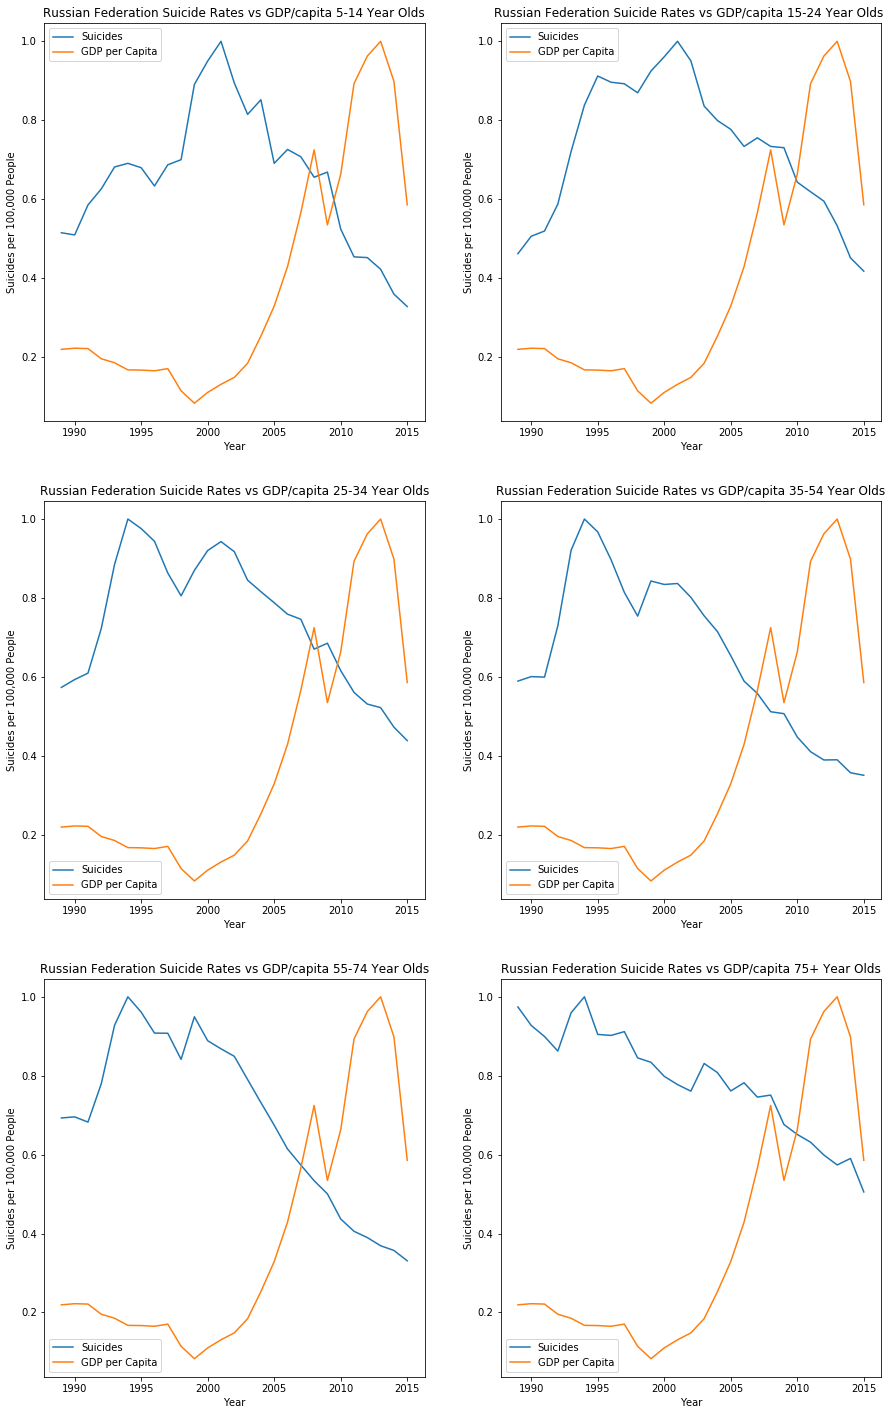

In [73]:
#plotting the GDP per capita against suicide rates from 1987-2014
plt.figure(figsize=(15, 10))

plt.subplot(3 ,2, 1)
plt.plot(russia_year_age1['year'], russia_year_age1['suicides/100k pop']/max(russia_year_age1['suicides/100k pop']), label='Suicides /100k Population')
plt.plot(russia['year'], russia['gdp_per_capita ($)']/max(russia['gdp_per_capita ($)']), label='GDP per Capita')
plt.title('Russian Federation Suicide Rates vs GDP/capita 5-14 Year Olds')
plt.ylabel('Suicides per 100,000 People')
plt.xlabel('Year')
plt.gca().legend(('Suicides','GDP per Capita'))

plt.subplot(3 ,2, 2)
plt.plot(russia_year_age2['year'], russia_year_age2['suicides/100k pop']/max(russia_year_age2['suicides/100k pop']))
plt.plot(russia['year'], russia['gdp_per_capita ($)']/max(russia['gdp_per_capita ($)']))
plt.title('Russian Federation Suicide Rates vs GDP/capita 15-24 Year Olds ')
plt.ylabel('Suicides per 100,000 People')
plt.xlabel('Year')
plt.gca().legend(('Suicides','GDP per Capita'))

plt.subplot(3 ,2, 3)
plt.plot(russia_year_age3['year'], russia_year_age3['suicides/100k pop']/max(russia_year_age3['suicides/100k pop']))
plt.plot(russia['year'], russia['gdp_per_capita ($)']/max(russia['gdp_per_capita ($)']))
plt.title('Russian Federation Suicide Rates vs GDP/capita 25-34 Year Olds')
plt.ylabel('Suicides per 100,000 People')
plt.xlabel('Year')
plt.gca().legend(('Suicides','GDP per Capita'))

plt.subplot(3 ,2, 4)
plt.plot(russia_year_age4['year'], russia_year_age4['suicides/100k pop']/max(russia_year_age4['suicides/100k pop']))
plt.plot(russia['year'], russia['gdp_per_capita ($)']/max(russia['gdp_per_capita ($)']))
plt.title('Russian Federation Suicide Rates vs GDP/capita 35-54 Year Olds')
plt.ylabel('Suicides per 100,000 People')
plt.xlabel('Year')
plt.gca().legend(('Suicides','GDP per Capita'))

plt.subplot(3 ,2, 5)
plt.plot(russia_year_age5['year'], russia_year_age5['suicides/100k pop']/max(russia_year_age5['suicides/100k pop']))
plt.plot(russia['year'], russia['gdp_per_capita ($)']/max(russia['gdp_per_capita ($)']))
plt.title('Russian Federation Suicide Rates vs GDP/capita 55-74 Year Olds')
plt.ylabel('Suicides per 100,000 People')
plt.xlabel('Year')
plt.gca().legend(('Suicides','GDP per Capita'))

plt.subplot(3 ,2, 6)
plt.plot(russia_year_age6['year'], russia_year_age6['suicides/100k pop']/max(russia_year_age6['suicides/100k pop']))
plt.plot(russia['year'], russia['gdp_per_capita ($)']/max(russia['gdp_per_capita ($)']))
plt.title('Russian Federation Suicide Rates vs GDP/capita 75+ Year Olds')
plt.ylabel('Suicides per 100,000 People')
plt.xlabel('Year')
plt.gca().legend(('Suicides','GDP per Capita'))

plt.subplots_adjust(bottom=-1)
plt.show()

In [112]:
#run pearsonr test on different age groups
from scipy.stats import pearsonr
russia_year_age_gender = russia.groupby(['age', 'year']).sum()
russia_year_age_gender = russia_year_age.reset_index()

russia_year_age_gender1 = russia_year_age_gender[russia_year_age_gender['age'] == '5-14 years']
russia_year_age_gender2 = russia_year_age_gender[russia_year_age_gender['age'] == '15-24 years']
russia_year_age_gender3 = russia_year_age_gender[russia_year_age_gender['age'] == '25-34 years']
russia_year_age_gender4 = russia_year_age_gender[russia_year_age_gender['age'] == '35-54 years']
russia_year_age_gender5 = russia_year_age_gender[russia_year_age_gender['age'] == '55-74 years']
russia_year_age_gender6 = russia_year_age_gender[russia_year_age_gender['age'] == '75+ years']

pearsonr1 = pearsonr(russia_year_age_gender1['gdp_per_capita ($)'], russia_year_age_gender1['suicides/100k pop'])
pearsonr2 = pearsonr(russia_year_age_gender2['gdp_per_capita ($)'], russia_year_age_gender2['suicides/100k pop'])
pearsonr3 = pearsonr(russia_year_age_gender3['gdp_per_capita ($)'], russia_year_age_gender3['suicides/100k pop'])
pearsonr4 = pearsonr(russia_year_age_gender4['gdp_per_capita ($)'], russia_year_age_gender4['suicides/100k pop'])
pearsonr5 = pearsonr(russia_year_age_gender5['gdp_per_capita ($)'], russia_year_age_gender5['suicides/100k pop'])
pearsonr6 = pearsonr(russia_year_age_gender5['gdp_per_capita ($)'], russia_year_age_gender6['suicides/100k pop'])

print(pearsonr1, 'pearson r results for age group 5-14 years old')
print(pearsonr2, 'pearson r results for age group 15-24 years old')
print(pearsonr3, 'pearson r results for age group 25-34years old')
print(pearsonr4, 'pearson r results for age group 35-54 years old')
print(pearsonr5, 'pearson r results for age group 55-74 years old')
print(pearsonr6, 'pearson r results for age group 75+ years old')


(-0.6881942138329986, 7.258054799842424e-05) pearson r results for age group 5-14 years old
(-0.583339920048003, 0.0014043807894797066) pearson r results for age group 15-24 years old
(-0.7571724496032357, 4.836672446854612e-06) pearson r results for age group 25-34years old
(-0.8625208455027974, 7.272789252442541e-09) pearson r results for age group 35-54 years old
(-0.9114314559621747, 3.9233691144212375e-11) pearson r results for age group 55-74 years old
(-0.8113073516527258, 2.839691425382859e-07) pearson r results for age group 75+ years old


In order to see if the economy played a role in the suicides of these age groups, the suicide numbers per 100,000 population were plotted against the GDP per capita to see if there was any trend. The graphs were normalized to account for the differing y-values in both the suicides/100k and GDP per capita. As the GDP per capita was low or decreasing, the suicide numbers generally increased or remained high. A pearson's r test was run for each age group to statistically test if there was indeed a correlation between gdp per capita and the suicide rates per 100k. The results showed that for every age group, there was a negative correlation with a low sig value to indicate that the pearson's r is statistically significant.

The Russian Federation experienced a a rapidly rising GDP per capita from 1999 to 2012 while also experiencing a rapidly decreasing rate of suicides. The USSR collapsed in 1991 and the cultural change could have influenced the suicide numbers. The collapse could also have affected the GDP down the road. As Russia moved toward a more capitalistic economy, that could have caused a rise in GDP which would then lead to a decrease in suicide rates. 

## Research Proposal


   From the data, the suicide numbers that the Russian Federation experienced generally increased among all age groups, except among 75+ year olds, from 1991 until around 1994. We know that the USSR collapsed in 1991 and that it probably caused a large cultural shift. It would be interesting if we could collect more data and see how much exactly the dissolution of the USSR affected GDP and suicide rates. 
    
   Another interesting proposal would be to see if other revolutions or government collapses caused a decrease/increase in GDP and how it affected suicide rates. In order to do this, we would need to see which countries experienced a government collapse or revolution and find out when it occured. Then the GDP per capita from a few years before and after would need to be analyzed against the suicide rates for that country. 